# Random forest

https://cienciadedatos.net/documentos/py08_random_forest_python

Un modelo Random Forest está formado por múltiples árboles de decisión individuales. Cada uno de estos árboles es entrenado con una muestra ligeramente diferente de los datos de entrenamiento, generada mediante una técnica conocida como bootstrapping. 

Ventajas

    Son capaces de seleccionar predictores más relevantes de forma automática.

    Pueden aplicarse a problemas de regresión y clasificación.

    Los árboles pueden, en teoría, manejar tanto predictores numéricos como categóricos sin tener que crear variables dummy o one-hot-encoding. En la práctica, esto depende de la implementación del algoritmo que tenga cada librería.

    Al ser métodos no paramétricos, no requieren que los datos sigan una distribución específica.

    Por lo general, necesitan menos limpieza y preprocesamiento de datos en comparación con otros métodos de aprendizaje estadístico. Por ejemplo, no requieren estandarización.

    Son menos susceptibles a ser influenciados por valores atípicos (outliers).

    Si el valor de un predictor no está disponible para una observación, aún se puede realizar una predicción utilizando las observaciones del último nodo alcanzado. La precisión de la predicción se verá reducida pero al menos podrá obtenerse.

    Son muy útiles en la exploración de datos, permiten identificar de forma rápida y eficiente las variables (predictores) más importantes.

    Gracias al Out-of-Bag Error, es posible estimar el error de validación sin recurrir a estrategias computacionalmente costosas como la validación cruzada. Esto no aplica en el caso de series temporales.

    Son adecuados para conjuntos de datos con un gran número de observaciones, demostrando una buena escalabilidad.

Desventajas

    La combinación de múltiples árboles reduce la capacidad de interpretación en comparación con modelos basados en un solo árbol.

    Al tratar con predictores continuos, se puede perder parte de la información al categorizarlos durante la división de los nodos.

    La técnica de recursive binary splitting utilizada para crear las ramificaciones de los árboles puede favorecer a los predictores continuos o cualitativos con muchos niveles, ya que tienen una mayor probabilidad de contener un punto de corte óptimo por azar.

    Tal y como se describe más adelante, la creación de las ramificaciones de los árboles se consigue mediante el algoritmo de recursive binary splitting. Este algoritmo identifica y evalúa las posibles divisiones de cada predictor acorde a una determinada medida (RSS, Gini, entropía…). Los predictores continuos o predictores cualitativos con muchos niveles tienen mayor probabilidad de contener, solo por azar, algún punto de corte óptimo, por lo que suelen verse favorecidos en la creación de los árboles.

    No son capaces de extrapolar fuera del rango observado en los datos de entrenamiento.

## Métodos de ensemble

El término "sesgo" (bias) se refiere a cuánto se desvían en promedio las predicciones de un modelo con respecto a los valores reales. Refleja la habilidad del modelo para capturar la verdadera relación entre los predictores y la variable de respuesta. Por ejemplo, si la relación sigue un patrón no lineal, un modelo de regresión lineal, independientemente de cuántos datos se disponga, no podrá modelar adecuadamente la relación y tendrá un sesgo alto.

Por otro lado, el término "varianza" hace referencia a cuánto cambia el modelo en función de los datos utilizados en su entrenamiento. Idealmente, un modelo no debería cambiar demasiado ante pequeñas variaciones en los datos de entrenamiento. Si esto ocurre, indica que el modelo está memorizando los datos en lugar de aprender la verdadera relación entre los predictores y la variable de respuesta. Por ejemplo, un modelo de árbol con muchos nodos tiende a cambiar su estructura incluso con pequeñas variaciones en los datos de entrenamiento, lo que indica que tiene alta varianza.

¿Cómo se controlan el bias y varianza en los modelos basados en árboles? Por lo general, los árboles pequeños, con pocas ramificaciones, tienden a tener poca varianza pero pueden no captar de manera precisa la relación entre las variables, lo que se traduce en un alto sesgo. Por otro lado, los árboles grandes se ajustan mucho a los datos de entrenamiento, lo que reduce el sesgo pero incrementa la varianza. Una forma de solucionar este problema son los métodos de ensemble.

Los métodos de ensemble combinan múltiples modelos en uno nuevo con el objetivo de lograr un equilibro entre bias y varianza, consiguiendo así mejores predicciones que cualquiera de los modelos individuales originales. Dos de los tipos de ensemble más utilizados son:

    Bagging: Se ajustan múltiples modelos, cada uno con un subconjunto distinto de los datos de entrenamiento. Para predecir, todos los modelos que forman el agregado participan aportando su predicción. Como valor final, se toma la media de todas las predicciones (variables continuas) o la clase más frecuente (variables categóricas). Los modelos Random Forest están dentro de esta categoría. (cada modelo saca su predicción y se calcula la media de los resultados o se elige la categoría más frecuente)

    Boosting: Se ajustan secuencialmente múltiples modelos sencillos, llamados weak learners, de forma que cada modelo aprende de los errores del anterior. Como valor final, al igual que en bagging, se toma la media de todas las predicciones (variables continuas) o la clase más frecuente (variables cualitativas). Tres de los métodos de boosting más empleados son AdaBoost, Gradient Boosting y Stochastic Gradient Boosting.

La clave para que los métodos de ensemble consigan mejores resultados que cualquiera de sus modelos individuales es que, los modelos que los forman, sean lo más diversos posibles (sus errores no estén correlacionados).

En el proceso de bagging, el número de árboles creados no es un hiperparámetro crítico en cuanto a que, por mucho que se incremente el número, no se aumenta el riesgo de overfitting. Alcanzado un determinado número de árboles, la reducción de test error se estabiliza. A pesar de ello, cada árbol ocupa memoria, por lo que no conviene almacenar más de los necesarios.

## Entrenamiento de Random Forest

El algoritmo de Random Forest es una modificación del proceso de bagging que consigue mejorar los resultados gracias a que decorrelaciona aún más los árboles generados en el proceso.

Recordando el apartado anterior, los beneficios de bagging se basan en el hecho de que, promediando un conjunto de modelos, se consigue reducir la varianza. Esto es cierto siempre y cuando los modelos agregados no estén correlacionados. Si la correlación es alta, la reducción de varianza que se puede lograr es pequeña.

## Out-of-Bag Error

Dada la naturaleza del proceso de bagging, resulta posible estimar el error de test sin necesidad de recurrir a métodos de validación cruzada (cross-validation). El hecho de que los árboles se ajusten empleando muestras generadas por bootstrapping conlleva que, en promedio, cada ajuste use solo aproximadamente dos tercios de las observaciones originales. Al tercio restante se le llama out-of-bag (OOB).

El Out-of-Bag Error no es adecuado cuando las observaciones tienen una relación temporal (series temporales). Como la selección de las observaciones que participan en cada entrenamiento es aleatoria, no respetan el orden temporal y se estaría introduciendo información a futuro.

El preprocesado de los datos de entrenamiento se hace de forma conjunta, por lo que las observaciones out-of-bag pueden sufrir data leakage(datos de testeo se colan en los de training). De ser así, las estimaciones del OOB-error son demasiado optimistas.

## Importancia de los predictores

Si bien es cierto que el proceso de bagging (Random Forest) consigue mejorar la capacidad predictiva en comparación a los modelos basados en un único árbol, esto tiene un coste asociado, la interpretabilidad del modelo se reduce. Al tratarse de una combinación de múltiples árboles, no es posible obtener una representación gráfica sencilla del modelo y no es inmediato identificar de forma visual que predictores son más importantes. Sin embargo, se han desarrollado nuevas estrategias para cuantificar la importancia de los predictores que hacen de los modelos de bagging (Random Forest) una herramienta muy potente, no solo para predecir, sino también para el análisis exploratorio. Dos de estas medidas son: importancia por permutación e impureza de nodos.

### Importancia por permutación

Identifica la influencia que tiene cada predictor sobre una determinada métrica de evaluación del modelo (estimada por out-of-bag error o validación cruzada). 

Si el predictor permutado estaba contribuyendo al modelo, es de esperar que el modelo aumente su error, ya que se pierde la información que proporcionaba esa variable. El porcentaje en que se incrementa el error debido a la permutación del predictor j puede interpretarse como la influencia que tiene j sobre el modelo. Algo que suele llevar a confusiones es el hecho de que este incremento puede resultar negativo. Si la variable no contribuye al modelo, es posible que, al reorganizarla aleatoriamente, solo por azar, se consiga mejorar ligeramente el modelo, por lo que (errorj−error0) es negativo. A modo general, se puede considerar que estas variables tiene una importancia próxima a cero.


### Incremento de la pureza de nodos

Cuantifica el incremento total en la pureza de los nodos debido a divisiones en las que participa el predictor (promedio de todos los árboles). La forma de calcularlo es la siguiente: en cada división de los árboles, se registra el descenso conseguido en la medida empleada como criterio de división (índice Gini, mse entropía, ...). Para cada uno de los predictores, se calcula el descenso medio conseguido en el conjunto de árboles que forman el ensemble. Cuanto mayor sea este valor medio, mayor la contribución del predictor en el modelo.

In [2]:


# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['font.size'] = 8

# Preprocesado y modelado
# ==============================================================================
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
from joblib import Parallel, delayed, cpu_count
import optuna

# Configuración warnings
# ==============================================================================
import warnings
optuna.logging.set_verbosity(optuna.logging.WARNING)

print(f"Versión de scikit-learn: {sklearn.__version__}")



Versión de scikit-learn: 1.5.2



    CRIM: tasa de delincuencia per cápita por ciudad.
    ZN: proporción de suelo residencial dividido para segmentos de más de 25.000 pies cuadrados.
    INDUS: proporción de superficie comerciales no minoristas por ciudad.
    CHAS: variable binaria sobre el río Charles (= 1 si la zona linda con el río; 0 en caso contrario).
    NOX: concentración de óxidos nítricos (partes por 10 millones).
    RM: número medio de habitaciones por vivienda.
    EDAD: proporción de viviendas ocupadas construidas antes de 1940.
    DIS: distancia ponderada a cinco centros de empleo en la ciudad de Boston.
    RAD: índice de accesibilidad a las autopistas radiales.
    TAX: impuesto sobre bienes inmuebles de valor íntegro por cada 10.000$.
    PTRATIO: ratio alumnos-profesor por ciudad.
    LSTAT: % de la población considerado de clase baja.
    MEDV: valor medio de las viviendas ocupadas por sus propietarios en miles de $.


In [2]:
# Descarga de datos
# ==============================================================================
url = (
    'https://raw.githubusercontent.com/JoaquinAmatRodrigo/Estadistica-machine-learning-python/'
    'master/data/Boston.csv'
)
datos = pd.read_csv(url, sep=',')
display(datos.head(3))
display(datos.info())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


None

In [3]:
# División de los datos en entrenamiento y test
# ==============================================================================
X_train, X_test, y_train, y_test = train_test_split(
                                        datos.drop(columns="MEDV"),
                                        datos['MEDV'],
                                        test_size = 0.25,
                                        random_state = 123
                                    )

print(f"Tamaño conjunto entrenamiento: {X_train.shape[0]}")
print(f"Tamaño conjunto test: {X_test.shape[0]}")

# Creación del modelo
# ==============================================================================
modelo = RandomForestRegressor(
            n_estimators = 10,
            criterion    = 'squared_error',
            max_depth    = None,
            max_features = 1,
            oob_score    = True,
            n_jobs       = -1,
            random_state = 123
         )

# Entrenamiento del modelo
# ==============================================================================
modelo.fit(X_train, y_train)

Tamaño conjunto entrenamiento: 379
Tamaño conjunto test: 127


C:\Users\PC1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(max_features=1, n_estimators=10, n_jobs=-1,
                      oob_score=True, random_state=123)

In [4]:
from sklearn.metrics import r2_score

# Error de test del modelo inicial
# ==============================================================================
predicciones = modelo.predict(X=X_test)
rmse = root_mean_squared_error(y_true=y_test, y_pred=predicciones)
r2=r2_score(y_true=y_test, y_pred=predicciones)
print(f"El error (rmse) de test es: {rmse}")
print(f"El r2 de test es: {r2}")


El error (rmse) de test es: 4.17800427058654
El r2 de test es: 0.7788798483287804


In [5]:
modelo.score(X_train, y_train)

0.9554770534052002

In [6]:
modelo.oob_score_

0.5478459634584069

In [7]:
r2_score(y_true=y_train, y_pred=modelo.predict(X=X_train))

0.9554770534052002

## Encontrar el número de árboles óptimo

Valor óptimo de n_estimators: 66


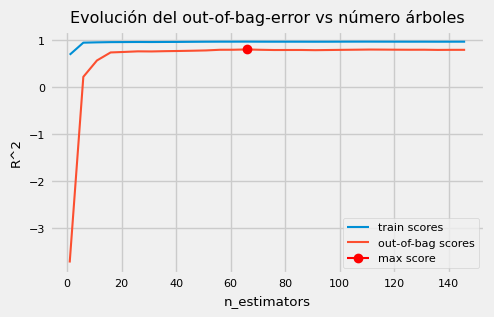

In [8]:


# Validación empleando el Out-of-Bag error
# ==============================================================================
warnings.filterwarnings('ignore')
train_scores = []
oob_scores   = []

# Valores evaluados
estimator_range = range(1, 150, 5)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de Out-of-Bag.
for n_estimators in estimator_range:
    modelo = RandomForestRegressor(
                n_estimators = n_estimators,
                criterion    = 'squared_error',
                max_depth    = None,
                max_features = 1,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    modelo.fit(X_train, y_train)
    train_scores.append(modelo.score(X_train, y_train))
    oob_scores.append(modelo.oob_score_)
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, oob_scores, label="out-of-bag scores")
ax.plot(estimator_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red", label="max score")
ax.set_ylabel("R^2")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del out-of-bag-error vs número árboles")
plt.legend();
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmax(oob_scores)]}")
warnings.filterwarnings('default')



Valor óptimo de n_estimators: 96


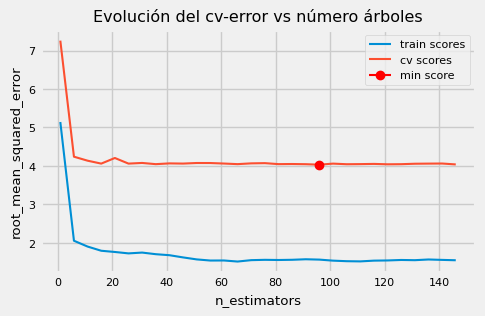

In [9]:
# Validación empleando k-cross-validation y neg_root_mean_squared_error
# ==============================================================================
train_scores = []
cv_scores    = []

# Valores evaluados
estimator_range = range(1, 150, 5)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de k-cross-validation.
for n_estimators in estimator_range:
    
    modelo = RandomForestRegressor(
                n_estimators = n_estimators,
                criterion    = 'squared_error',
                max_depth    = None,
                max_features = 1,
                oob_score    = False,
                n_jobs       = -1,
                random_state = 123
             )
    
    # Error de entrenamiento
    modelo.fit(X_train, y_train)
    predicciones = modelo.predict(X=X_train)
    rmse = root_mean_squared_error(
            y_true  = y_train,
            y_pred  = predicciones,
           )
    train_scores.append(rmse)
    
    # Error de validación cruzada
    scores = cross_val_score(
                estimator = modelo,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores.append(-1*scores.mean())
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, cv_scores, label="cv scores")
ax.plot(estimator_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del cv-error vs número árboles")
plt.legend();
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmin(cv_scores)]}")

Si bien el valor óptimo de las métricas se alcanza con 66 y 96 árboles, las curvas indican que, a partir de 20 árboles, el error de validación del modelo se estabiliza. 


## Max features

El valor de máx_features es uno de los hiperparámetros más importantes de random forest, ya que es el que permite controlar cuánto se decorrelacionan los árboles entre sí.


Valor óptimo de max_features: 4


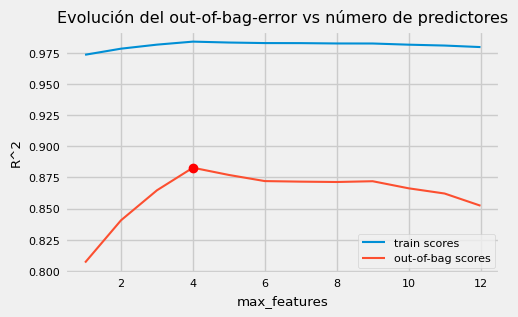

In [10]:
# Validación empleando el Out-of-Bag error
# ==============================================================================
train_scores = []
oob_scores   = []

# Valores evaluados
max_features_range = range(1, X_train.shape[1] + 1, 1)

# Bucle para entrenar un modelo con cada valor de max_features y extraer su error
# de entrenamiento y de Out-of-Bag.
for max_features in max_features_range:
    modelo = RandomForestRegressor(
                n_estimators = 66,
                criterion    = 'squared_error',
                max_depth    = None,
                max_features = max_features,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    modelo.fit(X_train, y_train)
    train_scores.append(modelo.score(X_train, y_train))
    oob_scores.append(modelo.oob_score_)
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(max_features_range, train_scores, label="train scores")
ax.plot(max_features_range, oob_scores, label="out-of-bag scores")
ax.plot(max_features_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red")
ax.set_ylabel("R^2")
ax.set_xlabel("max_features")
ax.set_title("Evolución del out-of-bag-error vs número de predictores")
plt.legend();
print(f"Valor óptimo de max_features: {max_features_range[np.argmax(oob_scores)]}")

Valor óptimo de max_features: 6


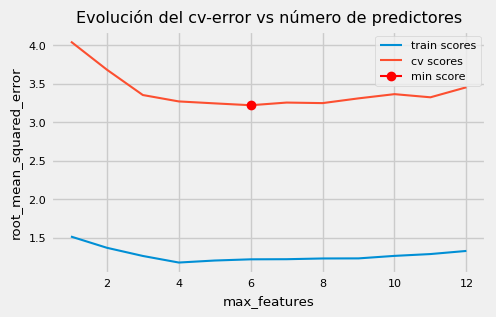

In [11]:


# Validación empleando k-cross-validation y neg_root_mean_squared_error
# ==============================================================================
train_scores = []
cv_scores    = []

# Valores evaluados
max_features_range = range(1, X_train.shape[1] + 1, 1)

# Bucle para entrenar un modelo con cada valor de max_features y extraer su error
# de entrenamiento y de k-cross-validation.
for max_features in max_features_range:
    
    modelo = RandomForestRegressor(
                n_estimators = 66,
                criterion    = 'squared_error',
                max_depth    = None,
                max_features = max_features,
                oob_score    = False,
                n_jobs       = -1,
                random_state = 123
             )
    
    # Error de train
    modelo.fit(X_train, y_train)
    predicciones = modelo.predict(X = X_train)
    rmse = root_mean_squared_error(
            y_true  = y_train,
            y_pred  = predicciones,
           )
    train_scores.append(rmse)
    
    # Error de validación cruzada
    scores = cross_val_score(
                estimator = modelo,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores.append(-1*scores.mean())
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(max_features_range, train_scores, label="train scores")
ax.plot(max_features_range, cv_scores, label="cv scores")
ax.plot(max_features_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("max_features")
ax.set_title("Evolución del cv-error vs número de predictores")
plt.legend();
print(f"Valor óptimo de max_features: {max_features_range[np.argmin(cv_scores)]}")



In [19]:
for params in param_grid:
    print(params)

{'max_depth': None, 'max_features': 5, 'n_estimators': 150}
{'max_depth': None, 'max_features': 7, 'n_estimators': 150}
{'max_depth': None, 'max_features': 9, 'n_estimators': 150}
{'max_depth': 3, 'max_features': 5, 'n_estimators': 150}
{'max_depth': 3, 'max_features': 7, 'n_estimators': 150}
{'max_depth': 3, 'max_features': 9, 'n_estimators': 150}
{'max_depth': 10, 'max_features': 5, 'n_estimators': 150}
{'max_depth': 10, 'max_features': 7, 'n_estimators': 150}
{'max_depth': 10, 'max_features': 9, 'n_estimators': 150}
{'max_depth': 20, 'max_features': 5, 'n_estimators': 150}
{'max_depth': 20, 'max_features': 7, 'n_estimators': 150}
{'max_depth': 20, 'max_features': 9, 'n_estimators': 150}


In [21]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = ParameterGrid(
                {'n_estimators': [150],
                 'max_features': [5, 7, 9],
                 'max_depth'   : [None, 3, 10, 20]
                }
             )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
resultados = {'params': [], 'oob_r2': []}

for params in param_grid:
    
    modelo = RandomForestRegressor(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123,
                ** params
             )
    
    modelo.fit(X_train, y_train)
    
    resultados['params'].append(params)
    resultados['oob_r2'].append(modelo.oob_score_)
    print(f"Modelo: {params} ✓")

# Resultados
# ==============================================================================



Modelo: {'max_depth': None, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'max_depth': None, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'max_depth': None, 'max_features': 9, 'n_estimators': 150} ✓
Modelo: {'max_depth': 3, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'max_depth': 3, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'max_depth': 3, 'max_features': 9, 'n_estimators': 150} ✓
Modelo: {'max_depth': 10, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'max_depth': 10, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'max_depth': 10, 'max_features': 9, 'n_estimators': 150} ✓
Modelo: {'max_depth': 20, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'max_depth': 20, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'max_depth': 20, 'max_features': 9, 'n_estimators': 150} ✓


In [24]:
# El diccionario queda guardado como una lista con un diccionario de params y una lista de oob. Al convertirlo a dataframe queda la primera columna con los diccionarios

resultados = pd.DataFrame(resultados)

In [31]:
# Este código convierte los diccionarions de la columna params en un dataframe con cada llave del diccionario como columna 
resultados['params'].apply(pd.Series)

,max_depth,max_features,n_estimators
0,NaN,5.0,150.0
1,NaN,7.0,150.0
2,NaN,9.0,150.0
3,3.0,5.0,150.0
4,3.0,7.0,150.0
5,3.0,9.0,150.0
6,10.0,5.0,150.0
7,10.0,7.0,150.0
8,10.0,9.0,150.0
9,20.0,5.0,150.0


In [32]:
# Se concatenan el dataframe "resultados" con la de los "params" para crear un DF con los oob errors, eliminando "params" que ya no es necesario.

resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.drop(columns = 'params')

In [33]:
# Se ordenan y se analizan los resultados

resultados = resultados.sort_values('oob_r2', ascending=False)
resultados.head(4)

,oob_r2,max_depth,max_features,n_estimators
6,0.882461,10.0,5.0,150.0
0,0.875289,NaN,5.0,150.0
9,0.874590,20.0,5.0,150.0
10,0.874318,20.0,7.0,150.0


Mismo método pero paralelizado para aprovechar todos los cpus del pc

In [35]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = ParameterGrid(
                {'n_estimators': [20,40,60,90],
                 'max_features': [4,5,6, 7, 9],
                 'max_depth'   : [None, 3, 10, 20]
                }
             )

# Loop paralelizado para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
def eval_oob_error(X, y, params, verbose=True):
    """
    Función para entrenar un modelo utilizando unos parámetros determinados
    y que devuelve el out-of-bag error
    """
    modelo = RandomForestRegressor(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123,
                ** params            
            )
    
    modelo.fit(X, y)
    
    if verbose:
        print(f"Modelo: {params} ✓")
        
    return{'params': params, 'oob_r2': modelo.oob_score_}

resultados = Parallel(n_jobs=cpu_count()-1)(
                delayed(eval_oob_error)(X_train, y_train, params)
                for params in param_grid
             )

# Resultados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.drop(columns = 'params')
resultados = resultados.sort_values('oob_r2', ascending=False)
resultados.head(4)

,oob_r2,max_depth,max_features,n_estimators
45,0.887472,10.0,5.0,40.0
46,0.886042,10.0,5.0,60.0
63,0.885047,20.0,4.0,90.0
47,0.884684,10.0,5.0,90.0


## Grid Search basado en validación cruzada

◙ Warning

La busqueda de hiperparámetros debe hacerse utilizando datos que el modelo no ha visto. Si se emplean los mismos datos para ajustar el modelo y para evaluarlo, se corre el riesgo de sobreajustar el modelo a los datos de entrenamiento. Para evitar este problema se puede recurrir a dos estrategias:

    Dividir el conjunto de datos en tres grupos: entrenamiento, validación y test. El conjunto de entrenamiento se emplea para ajustar el modelo, el de validación para seleccionar el valor óptimo de los hiperparámetros y el de test para evaluar la capacidad predictiva del modelo.

    Utilizar validación cruzada con los datos de entrenamiento. En este caso, el conjunto de entrenamiento se divide en k grupos y se ajusta el modelo k veces, cada vez con un grupo distinto como conjunto de validación. La métrica final es el promedio de los valores obtenidos en cada iteración. Esta estrategia es computacionalmente más costosa, ya que requiere entrenar el modelo k veces, pero evita tener que crear una partición adicional de los datos cuando no se dispone de muchos.


In [37]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'n_estimators': [150],
              'max_features': [5, 7, 9],
              'max_depth'   : [None, 3, 10, 20]
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
            estimator  = RandomForestRegressor(random_state = 123),
            param_grid = param_grid,
            scoring    = 'neg_root_mean_squared_error',
            n_jobs     = cpu_count() - 1,
            cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), 
            refit      = True,
            verbose    = 0,
            return_train_score = True
       )

grid.fit(X=X_train, y=y_train)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
6,10,5,150,-3.320295,0.701794,-1.323499,0.061678
7,10,7,150,-3.333357,0.696114,-1.327214,0.066324
0,None,5,150,-3.334407,0.715278,-1.261911,0.058096
9,20,5,150,-3.336755,0.716904,-1.261439,0.057603


In [38]:
modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X=X_test)
rmse = root_mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 3.550875871674505


In [40]:
modelo_final = RandomForestRegressor(
                n_estimators = 40,
                criterion    = 'squared_error',
                max_depth    = 10,
                max_features = 5,
                oob_score    = False,
                n_jobs       = -1,
                random_state = 123
             )
modelo_final.fit(X_train, y_train)
predicciones = modelo_final.predict(X=X_test)
rmse = root_mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 3.46213804043008


## Bayesian search

La búsqueda grid search y random search pueden generar buenos resultados, sobre todo cuando se reduce el rango de exploración. Sin embargo, ninguna de ellas tiene en cuenta los resultados obtenidos hasta el momento, lo que les impide centrar la búsqueda en las regiones de mayor interés y evitar las innecesarias.

Una alternativa es utilizar métodos de optimización bayesiana para buscar hiperparámetros. En términos generales, la optimización bayesiana de hiperparámetros consiste en crear un modelo probabilístico en el que la función objetivo es la métrica de validación del modelo (RMSE, AUC, precisión...). Con esta estrategia, la búsqueda se redirige en cada iteración a las regiones de mayor interés. El objetivo final es reducir el número de combinaciones de hiperparámetros con las que se evalúa el modelo, eligiendo sólo los mejores candidatos. Este enfoque es especialmente ventajoso cuando el espacio de búsqueda es muy grande o la evaluación del modelo es muy lenta.


In [41]:
# Búsqueda bayesiana de hiperparámetros con optuna
# ==============================================================================
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000, step=100),
        'max_depth': trial.suggest_int('max_depth', 3, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 100),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 100),
        'max_features': trial.suggest_float('max_features', 0.2, 1.0),
        'ccp_alpha': trial.suggest_float('ccp_alpha', 0.0, 1),
        # Fixed parameters
        'n_jobs': -1,
        'random_state': 4576688,
        
    }

    modelo = RandomForestRegressor(**params)
    cross_val_scores = cross_val_score(
        estimator = modelo,
        X = X_train,
        y = y_train,
        cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123),
        scoring = 'neg_root_mean_squared_error',
        n_jobs=-1
    )
    score = np.mean(cross_val_scores) 
    return score

study = optuna.create_study(direction='maximize') # Se maximiza por que el score es negativo
study.optimize(objective, n_trials=30, show_progress_bar=True, timeout=60*5)

print('Mejores hyperparameters:', study.best_params)
print('Mejor score:', study.best_value)

  0%|          | 0/30 [00:00<?, ?it/s]

Mejores hyperparameters: {'n_estimators': 300, 'max_depth': 9, 'min_samples_split': 19, 'min_samples_leaf': 1, 'max_features': 0.5643162464363646, 'ccp_alpha': 0.9202797517204956}
Mejor score: -3.7711831216592375


In [42]:


# Error de test del modelo final
# ==============================================================================
modelo_final = RandomForestRegressor(**study.best_params)
modelo_final.fit(X_train, y_train)
predicciones = modelo_final.predict(X=X_test)
rmse = root_mean_squared_error(y_true=y_test, y_pred=predicciones)
print(f"El error (rmse) de test es: {rmse}")



El error (rmse) de test es: 3.832543714669231


In [43]:


# Importancia de los predictores basada en la reducción de la impureza
# ==============================================================================
importancia_predictores = pd.DataFrame({
                            'predictor': datos.drop(columns = "MEDV").columns,
                            'importancia': modelo_final.feature_importances_
                          })
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

## Mayor entropía, menor impureza (más datos mezclados entre sí, menos datos clasificados correctamente)

## -Proporción de (A) * Log(Proporción de A) - Proporción de (B) * Log(Proporción de B)
## -P(A)*Log(P(A))-P(B)*Log(P(B))

# Entonces cuando se pasa de un nodo a otro, si la entropía es más baja que la del nodo anterior, la ganancia de la información es alta

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
5,RM,0.426278
11,LSTAT,0.324614
4,NOX,0.058595
7,DIS,0.051818
10,PTRATIO,0.042694
2,INDUS,0.037582
0,CRIM,0.037461
9,TAX,0.011725
6,AGE,0.007548
1,ZN,0.000911


## Importancia de los predictores basada en permutación

LSTAT y Rm tienen bastante importancia en el modelo, ojo, Lo que cuantifican es la influencia que tienen los predictores sobre el modelo, no su relación con la variable respuesta. Una forma de evitar problemas de este tipo es, siempre que se excluyan predictores de un modelo, comprobar el impacto que tiene en su capacidad predictiva.


In [44]:


# Importancia de los predictores basada en permutación
# ==============================================================================
importancia = permutation_importance(
                estimator    = modelo_final,
                X            = X_train,
                y            = y_train,
                n_repeats    = 5,
                scoring      = 'neg_root_mean_squared_error',
                n_jobs       = cpu_count() - 1,
                random_state = 123
             )

# Se almacenan los resultados (media y desviación) en un dataframe
df_importancia = pd.DataFrame(
                    {k: importancia[k] for k in ['importances_mean', 'importances_std']}
                 )
df_importancia['feature'] = X_train.columns
df_importancia.sort_values('importances_mean', ascending=False)



,importances_mean,importances_std,feature
11,3.834979,0.190263,LSTAT
5,3.779881,0.081376,RM
7,0.533752,0.028237,DIS
4,0.474860,0.058221,NOX
10,0.290996,0.032721,PTRATIO
0,0.275125,0.033171,CRIM
2,0.143050,0.024228,INDUS
9,0.105099,0.009662,TAX
6,0.036948,0.007417,AGE
8,0.005410,0.001026,RAD


# Random forest classification

In [2]:


# Lectura de datos
# ==============================================================================
carseats = sm.datasets.get_rdataset("Carseats", "ISLR")
datos = carseats.data
print(carseats.__doc__)



.. container::

   .. container::

      ======== ===============
      Carseats R Documentation
      ======== ===============

      .. rubric:: Sales of Child Car Seats
         :name: sales-of-child-car-seats

      .. rubric:: Description
         :name: description

      A simulated data set containing sales of child car seats at 400
      different stores.

      .. rubric:: Usage
         :name: usage

      .. code:: R

         Carseats

      .. rubric:: Format
         :name: format

      A data frame with 400 observations on the following 11 variables.

      ``Sales``
         Unit sales (in thousands) at each location

      ``CompPrice``
         Price charged by competitor at each location

      ``Income``
         Community income level (in thousands of dollars)

      ``Advertising``
         Local advertising budget for company at each location (in
         thousands of dollars)

      ``Population``
         Population size in region (in thousands)

      ``Pric

In [3]:


datos['ventas_altas'] = np.where(datos.Sales > 8, 0, 1)
# Una vez creada la nueva variable respuesta se descarta la original
datos = datos.drop(columns = 'Sales')



In [4]:


# División de los datos en train y test
# ==============================================================================
X_train, X_test, y_train, y_test = train_test_split(
                                        datos.drop(columns = 'ventas_altas'),
                                        datos['ventas_altas'],
                                        random_state = 123
                                    )

# One-hot-encoding de las variables categóricas
# ==============================================================================
# Se identifica el nobre de las columnas numéricas y categóricas
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()

# Se aplica one-hot-encoding solo a las columnas categóricas
preprocessor = ColumnTransformer(
                    [('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='if_binary'), cat_cols)],
                    remainder='passthrough',
                    verbose_feature_names_out=False
               ).set_output(transform="pandas")

# Una vez que se ha definido el objeto ColumnTransformer, con el método fit()
# se aprenden las transformaciones con los datos de entrenamiento y se aplican a
# los dos conjuntos con transform(). Ambas operaciones a la vez con fit_transform().
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)



In [5]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = ParameterGrid(
                {'n_estimators': [150],
                 'max_features': [5, 7, 9],
                 'max_depth'   : [None, 3, 10, 20],
                 'criterion'   : ['gini', 'entropy']
                }
            )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
resultados = {'params': [], 'oob_accuracy': []}

for params in param_grid:
    
    modelo = RandomForestClassifier(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123,
                ** params
             )
    
    modelo.fit(X_train_prep, y_train)
    
    resultados['params'].append(params)
    resultados['oob_accuracy'].append(modelo.oob_score_)
    print(f"Modelo: {params} \u2713")

# Resultados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.sort_values('oob_accuracy', ascending=False)
resultados = resultados.drop(columns='params')
resultados.head(4)

Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 9, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 9, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 9, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 20, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 20, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'criterio

,oob_accuracy,criterion,max_depth,max_features,n_estimators
22,0.820000,entropy,20.0,7,150
13,0.820000,entropy,NaN,7,150
0,0.813333,gini,NaN,5,150
6,0.813333,gini,10.0,5,150


In [14]:
model=RandomForestClassifier(
                n_estimators =150,
                max_depth =20,
                max_features = 7,
                criterion = 'entropy',
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )

In [15]:
model.fit(X_train_prep, y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, max_features=7,
                       n_estimators=150, n_jobs=-1, oob_score=True,
                       random_state=123)

In [16]:
y_pred=model.predict(X_test_prep)

Matriz de confusión
-------------------
[[34 16]
 [ 5 45]]

El accuracy de test es: 79.0 % 

              precision    recall  f1-score   support

           0       0.87      0.68      0.76        50
           1       0.74      0.90      0.81        50

    accuracy                           0.79       100
   macro avg       0.80      0.79      0.79       100
weighted avg       0.80      0.79      0.79       100



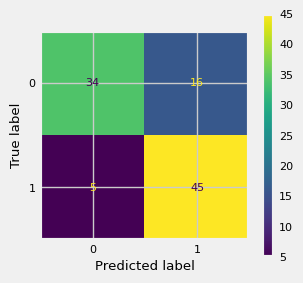

In [20]:
mat_confusion = confusion_matrix(y_true=y_test, y_pred=y_pred)
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred, normalize=True)
print("Matriz de confusión")
print("-------------------")
print(mat_confusion)
print("")
print(f"El accuracy de test es: {100 * accuracy} % \n")
fig, ax = plt.subplots(figsize=(3, 3))
ConfusionMatrixDisplay(mat_confusion).plot(ax=ax)

print(
    classification_report(
        y_true = y_test,
        y_pred = y_pred
    )
)

## Probabilidades 

Con .predict_proba(), en lugar de una clasificación, se obtiene la probabilidad con la que el modelo considera que cada observación puede pertenecer a cada una de las clases.

Supóngase el siguiente escenario: la campaña de navidad se aproxima y los propietarios de la cadena quieren duplicar el stock de artículos en aquellas tiendas de las que se preve que tengan ventas elevadas. Como el transporte de este material hasta las tiendas supone un coste elevado, el director quiere limitar esta estrategia únicamente a tiendas para las que se tenga mucha seguridad de que van conseguir muchas ventas.

Si se dispone de las probabilidades, se puede establecer un punto de corte concreto, por ejemplo, considerando únicamente como clase 1
(ventas altas) aquellas tiendas cuya predicción para esta clase sea superior al 0.9 (90%). De esta forma, la clasificación final se ajusta mejor a las necesidades del caso de uso.

In [26]:


# Predicción de probabilidades
# ==============================================================================
predicciones = modelo.predict_proba(X=X_test_prep)
predicciones[:5, :]



# Clasificación empleando la clase de mayor probabilidad
# ==============================================================================
df_predicciones = pd.DataFrame(data=predicciones, columns=['0', '1'])
df_predicciones['clasificacion_default_0.5'] = np.where(df_predicciones['0'] > df_predicciones['1'], 0, 1)
df_predicciones.head(3)

,0,1,clasificacion_default_0.5
0,0.840000,0.160000,0
1,0.726667,0.273333,0
2,0.886667,0.113333,0


In [30]:


# Clasificación final empleando un threshold de 0.8 para la clase 1.
# ==============================================================================
df_predicciones['clasificacion_custom_0.9'] = np.where(df_predicciones['1'] >= 0.9, 1, 0)
df_predicciones.iloc[4:10, :]



,0,1,clasificacion_default_0.5,clasificacion_custom_0.8,clasificacion_custom_0.9
4,0.733333,0.266667,0,0,0
5,0.733333,0.266667,0,0,0
6,0.080000,0.920000,1,1,1
7,0.540000,0.460000,0,0,0
8,0.100000,0.900000,1,1,1
9,0.120000,0.880000,1,0,0


In [32]:
importancia_predictores = pd.DataFrame(
                            {'predictor': X_train_prep.columns,
                             'importancia': modelo.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
9,Price,0.249941
5,CompPrice,0.126277
7,Advertising,0.120261
10,Age,0.099435
1,ShelveLoc_Good,0.094740
6,Income,0.089432
8,Population,0.059046
0,ShelveLoc_Bad,0.057988
11,Education,0.044988
2,ShelveLoc_Medium,0.029110


In [35]:
from joblib import Parallel, delayed, cpu_count

importancia = permutation_importance(
                estimator    = modelo,
                X            = X_train_prep,
                y            = y_train,
                n_repeats    = 5,
                scoring      = 'neg_root_mean_squared_error',
                n_jobs       = cpu_count() - 1,
                random_state = 123,
             )

# Se almacenan los resultados (media y desviación) en un dataframe
df_importancia = pd.DataFrame(
                    {k: importancia[k] for k in ['importances_mean', 'importances_std']}
                 )
df_importancia['feature'] = X_train_prep.columns
df_importancia.sort_values('importances_mean', ascending=False)



,importances_mean,importances_std,feature
9,0.481890,0.021185,Price
1,0.356748,0.008004,ShelveLoc_Good
7,0.327497,0.008881,Advertising
5,0.299559,0.016254,CompPrice
0,0.224358,0.031573,ShelveLoc_Bad
10,0.182204,0.011615,Age
6,0.130475,0.017599,Income
2,0.055754,0.029858,ShelveLoc_Medium
8,0.050971,0.027116,Population
11,0.023094,0.028284,Education


## Extrapolación con modelos Random Forest

Una límitación importante de los árboles de regresióna, y por lo tanto de Random Forest es que no extrapolan fuera del rango de entrenamiento. Cuando se aplica el modelo a una nueva observación, cuyo valor o valores de los predictores son superiores o inferiores a los observados en el entrenamiento, la predicción siempre es la media del nodo más cercano, independientemente de cuanto se aleje el valor. Vease el siguiente ejemplo en el que se entrenan dos modelos, un modelo lineal y un arbol de regresión, y luego se predicen valores de X
fuera del rango de entrenamiento.

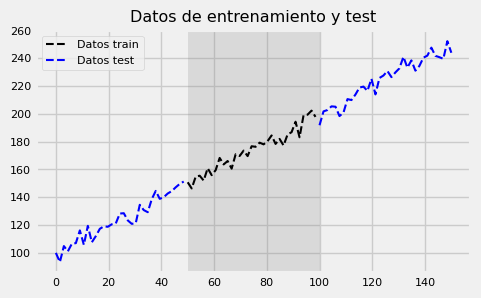

In [3]:


# Datos simulados
# ==============================================================================
X = np.linspace(0, 150, 100)
y = (X + 100) + np.random.normal(loc=0.0, scale=5.0, size=X.shape)
X_train = X[(X>=50) & (X<100)]
y_train = y[(X>=50) & (X<100)]
X_test_inf = X[X < 50]
y_test_inf = y[X < 50]
X_test_sup = X[X >= 100]
y_test_sup = y[X >= 100]

fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(X_train, y_train, c='black', linestyle='dashed', label = "Datos train")
ax.axvspan(50, 100, color='gray', alpha=0.2, lw=0)
ax.plot(X_test_inf, y_test_inf, c='blue', linestyle='dashed', label = "Datos test")
ax.plot(X_test_sup, y_test_sup, c='blue', linestyle='dashed')
ax.set_title("Datos de entrenamiento y test")
plt.legend();



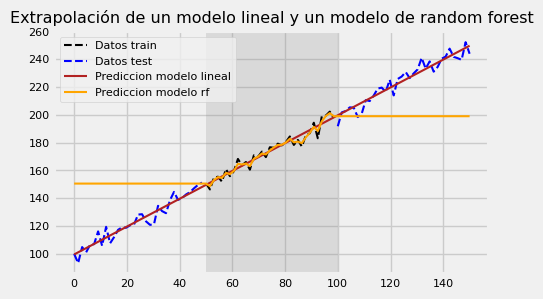

In [5]:
from sklearn.linear_model import LinearRegression
# Modelo lineal
modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train.reshape(-1, 1), y_train)

# Modelo random forest
modelo_rf = RandomForestRegressor()
modelo_rf.fit(X_train.reshape(-1, 1), y_train)

# Predicciones
prediccion_lineal = modelo_lineal.predict(X.reshape(-1, 1))
prediccion_rf  = modelo_rf.predict(X.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(X_train, y_train, c='black', linestyle='dashed', label = "Datos train")
ax.axvspan(50, 100, color='gray', alpha=0.2, lw=0)
ax.plot(X_test_inf, y_test_inf, c='blue', linestyle='dashed', label = "Datos test")
ax.plot(X_test_sup, y_test_sup, c='blue', linestyle='dashed')
ax.plot(X, prediccion_lineal, c='firebrick',
        label = "Prediccion modelo lineal")
ax.plot(X, prediccion_rf, c='orange',
        label = "Prediccion modelo rf")
ax.set_title("Extrapolación de un modelo lineal y un modelo de random forest")
plt.legend();

Una estrategia que permite que los modelos basados en árboles extrapolen es ajustar un modelo lineal en cada nodo terminal, pero esto no está disponible en Scikit-learn. 

# Random Forest con XGBoost

In [6]:
from xgboost import XGBRFRegressor
import xgboost
print(f"Versión de XGBoost: {xgboost.__version__}")

# Descarga de datos
# ==============================================================================
url = (
    'https://raw.githubusercontent.com/JoaquinAmatRodrigo/Estadistica-machine-learning-python/'
    'master/data/Boston.csv'
)
datos = pd.read_csv(url, sep=',')
datos.head(3)

# División de los datos en entrenamiento y test
# ==============================================================================
X_train, X_test, y_train, y_test = train_test_split(
                                        datos.drop(columns = "MEDV"),
                                        datos['MEDV'],
                                        random_state = 123
                                    )
# Creación del modelo
# ==============================================================================
modelo = XGBRFRegressor(
            n_estimators     = 100,
            tree_method      = 'hist',
            max_depth        = 10,
            max_leaves       = 5,
            learning_rate    = 1.0,
            subsample        = 0.8,
            colsample_bynode = 0.8,
            reg_lambda       = 1e-05,
            reg_alpha        = 0,
        )

# Entrenamiento del modelo
# ==============================================================================
modelo.fit(X_train, y_train)

Versión de XGBoost: 2.1.1


XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=10, max_leaves=5,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=100, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=0, ...)

In [7]:
# Predicciones
# ==============================================================================
predicciones = modelo.predict(X_test)

# Error de test
# ==============================================================================
rmse = root_mean_squared_error(y_true=y_test, y_pred=predicciones)
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 4.614579862569033


# Random Forest con LightGBM

In [8]:


from lightgbm import LGBMRegressor
import lightgbm
print(f"Versión de LightGBM: {lightgbm.__version__}")

# División de los datos en entrenamiento y test
# ==============================================================================
X_train, X_test, y_train, y_test = train_test_split(
                                        datos.drop(columns = "MEDV"),
                                        datos['MEDV'],
                                        random_state = 123
                                    )
# Creación del modelo
# ==============================================================================
modelo = LGBMRegressor(
            boosting_type="rf",
            n_estimators=50,
            max_depth=10,
            colsample_bytree=0.8,
            subsample=0.8,
            subsample_freq=1,
            reg_alpha= 1, # L1 regularización
            reg_lambda= 1, # L2 regularización
            verbose=-1
         )

# Entrenamiento del modelo
# ==============================================================================
modelo.fit(X_train, y_train)



Versión de LightGBM: 4.5.0


LGBMRegressor(boosting_type='rf', colsample_bytree=0.8, max_depth=10,
              n_estimators=50, reg_alpha=1, reg_lambda=1, subsample=0.8,
              subsample_freq=1, verbose=-1)

In [ ]:


# Predicciones
# ==============================================================================
predicciones = modelo.predict(X_test)
predicciones

# Error de test
# ==============================================================================
rmse = root_mean_squared_error(y_true=y_test, y_pred=predicciones)
print(f"El error (rmse) de test es: {rmse}")

